# CAP 6619 - Deep Learning
## Summer 2022 - Dr Marques
## Project 2

Deep learning solutions for: 
- Binary classification of movie reviews using the IMDB dataset
- Multiclass classification of newswires using the Reuters dataset
- Regression for house price estimation using the Boston Housing Price dataset

Useful references and sources:

- https://keras.io/api/datasets/imdb/
- https://www.tensorflow.org/datasets/catalog/imdb_reviews
- https://www.tensorflow.org/tutorials/keras/text_classification_with_hub
- https://colab.research.google.com/github/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb 
- https://developers.google.com/machine-learning/guides/text-classification/
- https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

#### (OPTIONAL) TODO 1

Add your own sources and references here.

- https://ml-cheatsheet.readthedocs.io/en/latest/index.html


## Setup

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np

## PART 1 - Binary classification of movie reviews using the IMDB dataset

We will start with a simple solution using a fully-connected neural network architecture. 

### Load and prepare the data

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

### Decoding reviews back to text

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


### Preparing the data

#### Encoding the integer sequences via multi-hot encoding

In [7]:
#
# Because neural networks cannot deal with integers natively (they are of different sizes), 
# we must convert the train_data list of integers (each of which map to actual words) instead to 
# to a list of Vectors, where each Vector is 10,000 elements, one element for each possible word
# [note that there are a maximum of 10,000 words available that we are parsing here].  
# So instead of having a Vector of say 100 integers, each represnting one word, we have a 
# Vector of 100 Vectors where each Vector is 10,000 elements, with a 1 for an element of the 
# given word, and a 0 for all other word entries. This is called 'multi-hot encoding' and 
# is the result of the vectorize_sequences function above and again is necessary because
# neural networks need to deal with underlying data that is the same 'size'
#
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):

        for j in sequence:
            results[i, j] = 1.

    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

print("first 10 elements of y_train data:")
for k in range(0, 10):
  print(y_train[k])

print()

print("first 10 elements of y_test data:")
for l in range(0, 10):
  print(y_test[l])

print()

first 10 elements of y_train data:
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0

first 10 elements of y_test data:
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0



### (OPTIONAL) TODO 2

Write code to show two examples of reviews (in plain text), one labeled as _positive_, another labeled as _negative_.

In [10]:
##############################################################################
# print_review()
# 
# we define a function here to decide the text and print it
# code modified from Deep Learning with Python text (page 98 Listing 4.2)
# text formatting code from  http://pymotw.com/2/textwrap/
# 
##############################################################################
def print_review(data, index):

  word_index = imdb.get_word_index()      # word index is a dictionary mapping words to integer index.
                                  
  reverse_word_index = dict(              # reverses it, mapping integer indices to words
      [(value, key) for (key, value) in word_index.items()])            

  # decodes the review in data[index] 
  # Note that the indices are offset by 3 because 0, 1, and 2 are 
  # reserved indices for "padding", "start of sequence", and "unknown"
  decoded_review = " ".join(        
    [reverse_word_index.get(i - 3, "?") for i in data[index]])          

  # let's format the review text so it is readable so we
  # double check that the label is correct (1 for positive and 0 for negative)
  import textwrap 

  print("review at data index[", index, "]")  
  print(textwrap.fill(decoded_review))
  print()

In [11]:
#############################################################################
#
# We define a DYNAMIC ARRAY CLASS 
# [Similar to Python List except can be indexed]
# so that we can manage the reviews.
#
# Code sourced from:
# https://www.geeksforgeeks.org/implementation-of-dynamic-array-in-python/
#   
#############################################################################    

import ctypes
  
class DynamicArray(object):

  #
  # initialize array
  #
  def __init__(self):
    self.n = 0 # Count actual elements (Default is 0)
    self.capacity = 1 # Default Capacity
    self.A = self.make_array(self.capacity)

  #
  # Return number of elements sorted in array
  #
  def __len__(self):
    return self.n

  #
  # Return element at index k    
  #
  def __getitem__(self, k):
    if not 0 <= k <self.n:                      # Check it k index is in bounds of array
      return IndexError('K is out of bounds !')      

    return self.A[k] # Retrieve from the array at index k
          
  #
  # Add element to end of the array
  #
  def append(self, ele):
    if self.n == self.capacity:
      self._resize(2 * self.capacity)     # Double capacity if not enough room

    self.A[self.n] = ele # Set self.n index to element
    self.n += 1
  
  #
  # This function inserts the item at any specified index.
  #
  def insertAt(self,item,index):
    if index<0 or index>self.n:
      print("please enter appropriate index..")
      return
          
    if self.n==self.capacity:
      self._resize(2*self.capacity)
      
    for i in range(self.n-1,index-1,-1):
      self.A[i+1]=self.A[i]
              
    self.A[index]=item
    self.n+=1
  
  #
  # This function deletes item from the end of array
  #
  def delete(self):
    if self.n==0:
      print("Array is empty deletion not Possible")
      return
          
    self.A[self.n-1]=0
    self.n-=1
                
  #    
  # This function deletes item from a specified index
  # 
  def removeAt(self,index):
    if self.n==0:
      print("Array is empty deletion not Possible")
      return
                  
    if index<0 or index>=self.n:
      return IndexError("Index out of bound....deletion not possible")        
    
    if index==self.n-1:
      self.A[index]=0
      self.n-=1
      return        
    
    for i in range(index,self.n-1):
      self.A[i]=self.A[i+1]            
    
    self.A[self.n-1]=0
    self.n-=1
  
  #
  # Resize internal array to capacity new_cap
  #           
  def _resize(self, new_cap):
    B = self.make_array(new_cap) # New bigger array
    
    for k in range(self.n): # Reference all existing values
      B[k] = self.A[k]
    
    self.A = B # Call A the new bigger array
    self.capacity = new_cap # Reset the capacity
          
  #
  # Returns a new array with new_cap capacity
  # 
  def make_array(self, new_cap):
    return (new_cap * ctypes.py_object)()

In [12]:
######################################################################
#
# here we define a function that takes a data set, splits into
# positive and negative reviews, and then prints out the top
# 'count' reviews for each data set
#
# input: 
# text is the actual array of words/text
# values is the arracy of predicted values (1 or 0 in this case)
# count is the number to print
# 
######################################################################

def top_reviews(text, values, count):

  positive_indeces = DynamicArray()
  negative_indeces = DynamicArray()

  # build positive index list  
  for i in range(0, values.size):
      if values[i] == 1:
        positive_indeces.append(i)

  # build negative index list
  for j in range(0, values.size):
      if values[j] == 0:
        negative_indeces.append(j)

  #
  # print the positive reviews
  # note this calls print_review which prints
  # the text from the relevant index
  #
  print()
  print("***********POSITIVE REVIEWS***********")
  print()

  for p in range(0, count):
    print_review(text, positive_indeces[p])

  #
  # print the negative reviews
  # note this calls print_review which prints
  # the text from the relevant index
  print() 
  print("***********NEGATIVE REVIEWS***********")
  print()

  for q in range (0, count):
    print_review(text, negative_indeces[q])

In [13]:
###############################################################################
#
# now we will loop through training labels and find all 
# positive reviews and put them in a positive review list, and
# then do the same for negative review list
# 
# so we can look at the data and eyeball for correctness as needed 
# 
# sample array (sorry list) code from 
# https://www.tutorialspoint.com/implementation-of-dynamic-array-in-python
# looks like this creates a dynamic list object in line
# 
###############################################################################

#positive_index_list = []
#type (positive_index_list)

positive_index_list = DynamicArray()

top_reviews(train_data, train_labels, 3)


***********POSITIVE REVIEWS***********

review at data index[ 0 ]
? this film was just brilliant casting location scenery story
direction everyone's really suited the part they played and you could
just imagine being there robert ? is an amazing actor and now the same
being director ? father came from the same scottish island as myself
so i loved the fact there was a real connection with this film the
witty remarks throughout the film were great it was just brilliant so
much that i bought the film as soon as it was released for ? and would
recommend it to everyone to watch and the fly fishing was amazing
really cried at the end it was so sad and you know what they say if
you cry at a film it must have been good and this definitely was also
? to the two little boy's that played the ? of norman and paul they
were just brilliant children are often left out of the ? list i think
because the stars that play them all grown up are such a big profile
for the whole film but these children are 

### Building your model

#### Model definition

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#### Compiling the model

In [15]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [16]:
#
# x_val is a copy of elements 0-9,999 of x_train
#
x_val = x_train[:10000]        
x_val_train_data = train_data[:10000]           

print("x_train shape: ", x_train.shape)
print("x_val shape: ", x_val.shape)

#
# partial_x_train is a copy of x_train from element 10,000 to 24,999
#
partial_x_train = x_train[10000:]     
partial_x_train_data = train_data[10000:]

print("partial_x_train shape: ", partial_x_train.shape)

#
# y_val is a copy of elements 0-9,999 of y_train
#
y_val = y_train[:10000]               

print("y_train shape: ", y_train.shape)
print("y_val shape: ", y_val.shape)

#
# partial_y_train is a copy of y_train from element 10,000 to 24,999
#
partial_y_train = y_train[10000:]     

print("partial_y_train shape: ", partial_y_train.shape)


x_train shape:  (25000, 10000)
x_val shape:  (10000, 10000)
partial_x_train shape:  (15000, 10000)
y_train shape:  (25000,)
y_val shape:  (10000,)
partial_y_train shape:  (15000,)


#### Training your model

In [17]:
#
# here we 'fit' the model
# note that we 'train' the model on partial_x_train and partial_y_train data, 
# the last 15,000 elements of the x_train and y_train data set (25,000 elements) 
# 
# and the validation data we use is the first 10,000 elements of 
# the training data set, parsed above: ie x_val and y_val
#
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5674 - accuracy: 0.7466 - val_loss: 0.4368 - val_accuracy: 0.8682
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3476 - accuracy: 0.8949 - val_loss: 0.3236 - val_accuracy: 0.8882
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2418 - accuracy: 0.9264 - val_loss: 0.2984 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1881 - accuracy: 0.9390 - val_loss: 0.2772 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1505 - accuracy: 0.9537 - val_loss: 0.3578 - val_accuracy: 0.8558
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1260 - accuracy: 0.9605 - val_loss: 0.2914 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1026 - accuracy: 0.9697 - val_loss: 0.3051 - val_accuracy: 0.8821
Epoch 8/20
30

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

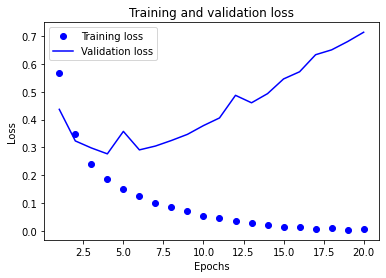

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

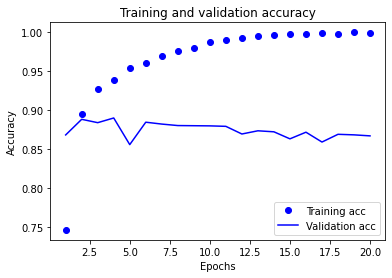

In [20]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### (OPTIONAL) TODO 3

Write code to display 2 cases (one false positive, one false negative) where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.

Comment on the mistakes and what you believe might have caused each of them. 

In [21]:
# evaluate the model
model.evaluate(partial_x_train, partial_y_train)     # training data metrics

model.evaluate(x_val, y_val)                         # validation data metrics

313/313 [==============================] - 1s 2ms/step - loss: 0.7131 - accuracy: 0.8670


[0.7131481170654297, 0.8669999837875366]

In [22]:
# get predicted values
yhat = model.predict(x_val)   # predicted values on validation data

# inspect the data set
print(yhat.shape)

#
# print first 20 predicted and actual (true) values
#
for j in range (0,100):
  num = yhat[j][0]
  predicted_two_dec = "{:.2f}".format(num)
  rounded = round(num)
  
  if (rounded == round(y_val[j])):
    mismatch = False
  else:
    mismatch = True

  print("predicted: ", predicted_two_dec, "; Rounded Predicted: ", rounded, "; Actual (True): ", round(y_val[j]), mismatch)

(10000, 1)
predicted:  1.00 ; Rounded Predicted:  1 ; Actual (True):  1 False
predicted:  0.00 ; Rounded Predicted:  0 ; Actual (True):  0 False
predicted:  0.00 ; Rounded Predicted:  0 ; Actual (True):  0 False
predicted:  1.00 ; Rounded Predicted:  1 ; Actual (True):  1 False
predicted:  0.00 ; Rounded Predicted:  0 ; Actual (True):  0 False
predicted:  0.02 ; Rounded Predicted:  0 ; Actual (True):  0 False
predicted:  1.00 ; Rounded Predicted:  1 ; Actual (True):  1 False
predicted:  0.00 ; Rounded Predicted:  0 ; Actual (True):  0 False
predicted:  1.00 ; Rounded Predicted:  1 ; Actual (True):  1 False
predicted:  0.02 ; Rounded Predicted:  0 ; Actual (True):  0 False
predicted:  1.00 ; Rounded Predicted:  1 ; Actual (True):  1 False
predicted:  0.00 ; Rounded Predicted:  0 ; Actual (True):  0 False
predicted:  0.01 ; Rounded Predicted:  0 ; Actual (True):  0 False
predicted:  0.00 ; Rounded Predicted:  0 ; Actual (True):  0 False
predicted:  0.01 ; Rounded Predicted:  0 ; Actual (

In [23]:
################################################################################
#
# we build a list of mismatched values now
# where the predicted value =! actual ('true') value
# 
# NB that since we are using sugmoid activation function, the 
# predicted values are returned between 0 and 1, if they are closer 
# to 0 (rounded) then the predicted value is 0, or negative and if 
# they are close to 1 (rounded) then the predicted value is 1, or positive
#
################################################################################

mismatches_indeces = DynamicArray()

false_positives = DynamicArray()
false_negatives = DynamicArray()

for k in range (0, yhat.size):

  pred_value = round(yhat[k][0])
  true_value = round(y_val[k])
  
  if (pred_value != true_value):
    mismatches_indeces.append(k)
    
    if (pred_value == 1 and true_value == 0):
#      print("False Positive found at index: ", k, "; Predicted: ", pred_value, "; Actual (True): ", true_value)
      false_positives.append(k)
    else:
#      print("False Negative found at index: ", k, "Predicted: ", pred_value, "; Actual (True): ", true_value)
      false_negatives.append(k)

#      
# let's double check the model metrics now, since we have the data
#
numReviews = yhat.size

numMismatches = mismatches_indeces.n
numFalsePositives = false_positives.n
numFalseNegatives = false_negatives.n

numCorrect = numReviews - numMismatches
accuracy = numCorrect/numReviews

print("######  Validation Data Set Summary Metrics  ######")
print("#Reviews: ", numReviews, "; #MisMatches: ", numMismatches, "; #FalsePositives: ", numFalsePositives, 
      "; #FalseNegatives: ", numFalseNegatives, "; #Correct: ", numCorrect, "; Accuracy Rate: ", accuracy)

######  Validation Data Set Summary Metrics  ######
#Reviews:  10000 ; #MisMatches:  1330 ; #FalsePositives:  689 ; #FalseNegatives:  641 ; #Correct:  8670 ; Accuracy Rate:  0.867


### (OPTIONAL) TODO 4

Write code to try different combinations of:
- numbers of hidden layers and units per layer 
- loss functions
- activation functions

Please refrain from using better architectures (RNN, LSTM, etc.) and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

****

**SEE BELOW**

### Retraining a model from scratch

In [24]:
#################################################################
#
# here we create a second model (model2) to compare to first
# we increase the number of units (dimensions), 
# add another layer, change the activation function and 
# see generally what the effect is on the model
#
#################################################################

model2 = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

#
# experiement with different loss function
#
model2.compile(optimizer="rmsprop",
              #loss="binary_crossentropy",
              loss="mse",
              metrics=["accuracy"])

#
# here we 'fit' the model again, except this time we 
# use the full training data set
#
# 10 epochs is a good number, minimizing overfitting
#
history2 = model2.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict2 = history2.history
history_dict2.keys()

Epoch 1/10
49/49 [==============================] - 3s 51ms/step - loss: 0.1293 - accuracy: 0.8175 - val_loss: 0.0609 - val_accuracy: 0.9221
Epoch 2/10
49/49 [==============================] - 2s 46ms/step - loss: 0.0668 - accuracy: 0.9118 - val_loss: 0.0387 - val_accuracy: 0.9537
Epoch 3/10
49/49 [==============================] - 2s 46ms/step - loss: 0.0544 - accuracy: 0.9295 - val_loss: 0.0379 - val_accuracy: 0.9539
Epoch 4/10
49/49 [==============================] - 2s 46ms/step - loss: 0.0452 - accuracy: 0.9416 - val_loss: 0.0317 - val_accuracy: 0.9623
Epoch 5/10
49/49 [==============================] - 2s 46ms/step - loss: 0.0396 - accuracy: 0.9511 - val_loss: 0.0288 - val_accuracy: 0.9663
Epoch 6/10
49/49 [==============================] - 2s 46ms/step - loss: 0.0349 - accuracy: 0.9581 - val_loss: 0.0212 - val_accuracy: 0.9774
Epoch 7/10
49/49 [==============================] - 2s 46ms/step - loss: 0.0320 - accuracy: 0.9614 - val_loss: 0.0223 - val_accuracy: 0.9746
Epoch 8/10
49

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

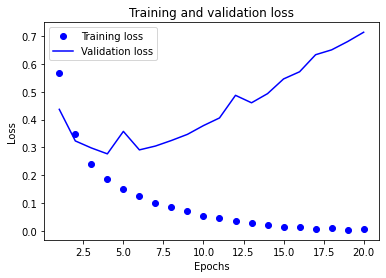

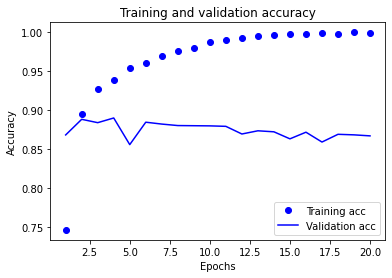

In [25]:
#
# print out the loss and accuracy graphs to see how well we did
#
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [26]:
print("**Original Model Metrics**")
model.evaluate(partial_x_train, partial_y_train)      # training data metrics
model.evaluate(x_val, y_val)                          # validation data

print()
print("**New Model Metrics**")
model2.evaluate(partial_x_train, partial_y_train)     # evaluate on the training data set
model2.evaluate(x_val, y_val)                         # validation data here


**Original Model Metrics**
313/313 [==============================] - 1s 2ms/step - loss: 0.7131 - accuracy: 0.8670

**New Model Metrics**
313/313 [==============================] - 1s 2ms/step - loss: 0.0315 - accuracy: 0.9611


[0.03146354481577873, 0.9610999822616577]

### Using a trained model to generate predictions on new data

In [27]:
# get predictions on new data from both models
yhat2 = model.predict(x_test)
yhat3 = model2.predict(x_test)

# evaluate both models on new data
model.evaluate(x_test, y_test)      
model2.evaluate(x_test, y_test)     

782/782 [==============================] - 2s 3ms/step - loss: 0.1316 - accuracy: 0.8456


[0.13161082565784454, 0.8456000089645386]

### CONCLUSIONS
***Questions: PART 1:***

**(1) What type of preprocessing was applied to the raw input data? Why was
it necessary to do so?**

*You have to get the data into Vectors, normalized Vectors so that the models can work with them (ie perform Vector and Matrix multiplication on them presumably). Given the data set, we are first converting from actual words in the dictionary (max 10,000 word set) first to integers, and then into Vectors of 10,000 entries with just one entry for the given word set to 1 and the rest set to 0 - this is called a one hot encoding.* 

*You can find a good overview of what one hot encoding is, and how to get it to work, can be found at https://medium.com/analytics-vidhya/one-hot-encoding-of-text-data-in-natural-language-processing-2242fefb2148.*

**(2) Does your model suffer from overfitting? If so, what would you suggest
doing about it?**

*Yes, it clearly overfits the training data after around 5 epochs or so. Unadvisable to train the model beyond that it looks like (based on testing). Adding additional layers, increasing the number of units per layer, none of those settings appear to change the final accuracy numbers which hover around 87%*

**(3) Is accuracy a good metric of success in this case? Why (not)?**

*Yes. Although it would be interesting to see how you could have both a predicted value, and an estimate as to the accuracy of said predicted value for each element in the data set(s). Not sure how to do this.*


**(4) What can you say about the performance of the different models that you used?**

*Adding layers (+ some changes in activation and loss function) did not have much impact ob the validation data but it did perform better (the new model) on the test data.*

## PART 2 - Multiclass classification of newswires using the Reuters dataset

Once again, we will start with a simple solution using a fully-connected neural network architecture. 

### The Reuters dataset

#### Loading the Reuters dataset

In [29]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [30]:
len(train_data)

8982

In [31]:
len(test_data)

2246

In [32]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

#### Decoding newswires back to text

In [33]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [34]:
train_labels[10]

3

### Preparing the data

#### Encoding the input data

In [35]:
#
# Because neural networks cannot deal with integers natively (they are of different sizes), 
# we must convert the train_data list of integers (each of which map to actual words) instead to 
# to a list of Vectors, where each Vector is 10,000 elements, one element for each possible word
# [note that there are a maximum of 10,000 words available that we are parsing here].  
# So instead of having a Vector of say 100 integers, each represnting one word, we have a 
# Vector of 100 Vectors where each Vector is 10,000 elements, with a 1 for an element of the 
# given word, and a 0 for all other word entries. This is called 'multi-hot encoding' and 
# is the result of the vectorize_sequences function above and again is necessary because
# neural networks need to deal with underlying data that is the same 'size'
#
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### Encoding the labels

In [36]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
    
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [37]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building (initial) model

#### Model definition

In [38]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

#### Compiling the model

In [39]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [40]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#### Training the model

In [41]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 54ms/step - loss: 2.7414 - accuracy: 0.5089 - val_loss: 1.7841 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.4268 - accuracy: 0.7106 - val_loss: 1.2964 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0369 - accuracy: 0.7791 - val_loss: 1.1072 - val_accuracy: 0.7650
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8094 - accuracy: 0.8252 - val_loss: 1.0121 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6478 - accuracy: 0.8609 - val_loss: 0.9724 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 1s 44ms/step - loss: 0.5188 - accuracy: 0.8915 - val_loss: 0.9133 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4163 - accuracy: 0.9132 - val_loss: 0.8924 - val_accuracy: 0.8130
Epoch 8/20
16

In [42]:
#####################################################################
# evaluate the model  
#####################################################################
results = model.evaluate(partial_x_train, partial_y_train)
results = model.evaluate(x_val, y_val)
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.2023 - accuracy: 0.7907


#### Plotting the training and validation loss

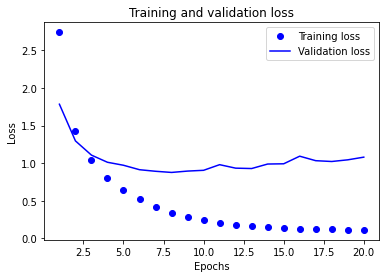

In [43]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

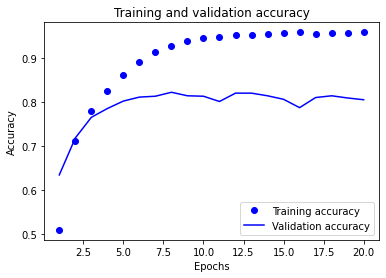

In [44]:
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

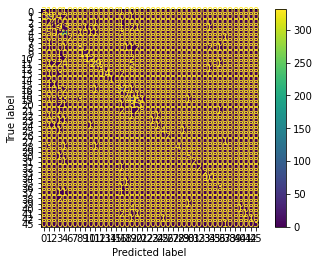

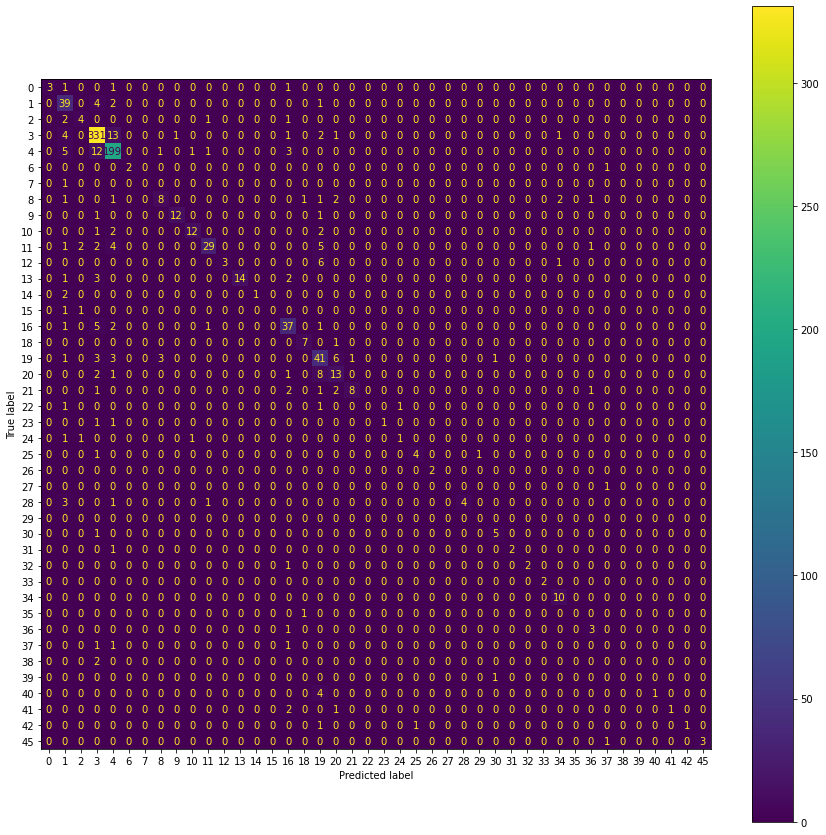

In [45]:
# 
# let's try and display the Confusion Matrix if we can
# we try and leverage the same code from IMDB data set
#
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


#
# get predicted value from validation data set
#
y_pred = model.predict(x_val)
Y_pred = np.argmax(y_pred, 1)

Y_test = np.argmax(y_val, 1)    # get actual value from validation data set

cm = confusion_matrix(Y_test,Y_pred)

#
# note that the labels are NOT 0-45 as some classifications 
# do not exist in the (validation) data set
#
#cmp = ConfusionMatrixDisplay(cm, display_labels=np.arange(46))

#disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)

#print (disp.display_labels)   

cmp = ConfusionMatrixDisplay(
    cm, 
    display_labels=metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred).display_labels
    )

#
# print confusion matrix, expanded to support greater size
#
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax)

#plt.show()

### (OPTIONAL) TODO 5

Write code to try different combinations of:
- numbers of hidden layers and units per layer 

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

****

**SEE BELOW**

### Building / Retraining model from scratch

In [46]:
############################################################################ 
# Build a new model and retrain, trying a few different parameters to see 
# what the results look like the first being the number of epochs and then 
# units per Dense network layer and then we add an additional layer. 
############################################################################

model2 = keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(46, activation="softmax")
])

model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history2 = model2.fit(x_train,
                    y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/8
18/18 [==============================] - 2s 93ms/step - loss: 2.1005 - accuracy: 0.5662 - val_loss: 1.3827 - val_accuracy: 0.6941
Epoch 2/8
18/18 [==============================] - 1s 72ms/step - loss: 1.0859 - accuracy: 0.7587 - val_loss: 1.1751 - val_accuracy: 0.7315
Epoch 3/8
18/18 [==============================] - 1s 71ms/step - loss: 0.7997 - accuracy: 0.8199 - val_loss: 1.0290 - val_accuracy: 0.7747
Epoch 4/8
18/18 [==============================] - 1s 72ms/step - loss: 0.5646 - accuracy: 0.8762 - val_loss: 1.1381 - val_accuracy: 0.7413
Epoch 5/8
18/18 [==============================] - 2s 97ms/step - loss: 0.4133 - accuracy: 0.9051 - val_loss: 1.2588 - val_accuracy: 0.7244
Epoch 6/8
18/18 [==============================] - 1s 72ms/step - loss: 0.3296 - accuracy: 0.9271 - val_loss: 0.9736 - val_accuracy: 0.8001
Epoch 7/8
18/18 [==============================] - 1s 73ms/step - loss: 0.2559 - accuracy: 0.9410 - val_loss: 1.0957 - val_accuracy: 0.7805
Epoch 8/8
18/18 [===

In [47]:
#####################################################################
# evaluate the new model  
#####################################################################
results = model2.evaluate(partial_x_train, partial_y_train)
results = model2.evaluate(x_val, y_val)
results = model2.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9854 - accuracy: 0.8063


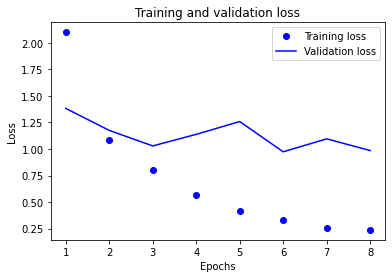

In [48]:
loss = history2.history["loss"]
val_loss = history2.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

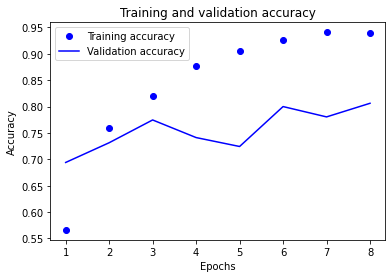

In [49]:
plt.clf()

acc = history2.history["accuracy"]
val_acc = history2.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [50]:
# here, following the text, we calcualte what the accuracy 
# rate would be for a random classifier
#
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19590382902938558

### Generating predictions on new data

In [51]:
predictions = model2.predict(x_test)

In [52]:
predictions[0].shape

(46,)

In [53]:
np.sum(predictions[0])

1.0000002

In [54]:
np.argmax(predictions[0])

3

### CONCLUSIONS


***Questions: PART 2:***

**(1) What type of preprocessing was applied to the raw input data? Why was
it necessary to do so?**

*Same type of preprocessing was done here in this example as was done in the IMDB data set example - converting text to integers, maxing out the number of words that we want to manage (10,000) and then 'vectorizing' the integers (word representations) using one hot encoding. All of this is necessary so that the network can work with the data - ie perform the necessary matrix multiplication and other functions necessary to move between layers and process the data (integers are not all the same size).*

**(2) How many categories are there in this case?**

*In this case we are dealing with 46 categorizes of data, versus the 2 in the IMDB (binary classification) case. This case is called 'multiclass classification'.* The resulting predictions are an array of 46 values with a probability for each of the categories in the classification set, with the total of 46 entries adding up to one (argmax beung the most probable outcome, or prediction).

**(3) Does your model suffer from overfitting? If so, what would you suggest
doing about it?**

*Yes, just as the IMDB data set did. The recommended approach in these cases, at least the most simple and straightforward, is to stop training the data set as it starts to over fit, so - review how it does with your baseline set of trauning cycles (epochs) and then see where it starts to overfit and then stop training. Looks like that value is around 7 or 9 epochs, regardless of the size, # of units, of the neural network or the number of layers we use.*

**(4) Is accuracy a good metric of success in this case? Why (not)?**

*Good enough, gives us a good indication as to the probability of a given classification for a given input data set. This is all we can ask for I would think.*


**(5) What can you say about the different model variations?**

*The second model, which had fewer epochs (to avoid overfitting), added one extra layer and doubled the size of the units (dimensions) per layer, performed much better on the full validation set but the same on test_data. Predictions (accuracy) are clearly very data specific.*

## PART 3 - Regression for house price estimation using the Boston Housing Price dataset

#### Loading the Boston housing dataset

In [55]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [56]:
train_data.shape

(404, 13)

In [57]:
test_data.shape

(102, 13)

In [58]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

#### Normalizing the data

In [59]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

#### Model definition

In [60]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

In [61]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):

#    print(f"Processing fold #{i}")
    
    firstindex = i*num_val_samples
    secondindex = (i+1)*num_val_samples

    print(f"FOLD #{i} Validation Data: train_data[{firstindex}:{secondindex}]")
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    print(f"val_data shape: {val_data.shape}")

    print(f"FOLD #{i} (Partial) Train Data: train_data[:{firstindex}] + train_data[{secondindex}:]")

    #
    # note that the partial_train_data
    # is all of the validation data that is NOT
    # included in teh array above, ie val_data
    #
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    print(f"partial_train_data shape: {partial_train_data.shape}")

    print("building, fitting and evaluating model...")

    model = build_model()

    #
    # fit the model against the partial_train_data set
    #
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    
    #
    # evaluate the model against the validation data set
    # then add the mae (mean absolute error) metric to the
    # all scores array
    #
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    
    print()
    
    all_scores.append(val_mae)       

FOLD #0 Validation Data: train_data[0:101]
val_data shape: (101, 13)
FOLD #0 (Partial) Train Data: train_data[:0] + train_data[101:]
partial_train_data shape: (303, 13)
building, fitting and evaluating model...

FOLD #1 Validation Data: train_data[101:202]
val_data shape: (101, 13)
FOLD #1 (Partial) Train Data: train_data[:101] + train_data[202:]
partial_train_data shape: (303, 13)
building, fitting and evaluating model...

FOLD #2 Validation Data: train_data[202:303]
val_data shape: (101, 13)
FOLD #2 (Partial) Train Data: train_data[:202] + train_data[303:]
partial_train_data shape: (303, 13)
building, fitting and evaluating model...

FOLD #3 Validation Data: train_data[303:404]
val_data shape: (101, 13)
FOLD #3 (Partial) Train Data: train_data[:303] + train_data[404:]
partial_train_data shape: (303, 13)
building, fitting and evaluating model...



In [62]:
all_scores

[1.8646963834762573, 2.594259738922119, 2.401808977127075, 2.5840258598327637]

In [63]:
np.mean(all_scores)

2.361197739839554

#### Saving the validation logs at each fold

In [64]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


#### Building the history of successive mean K-fold validation scores

In [65]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#### Plotting validation scores

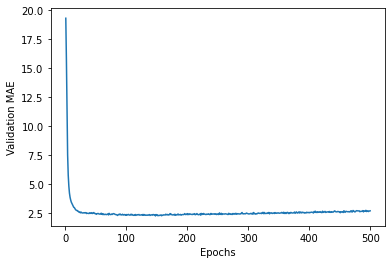

In [66]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

#### Plotting validation scores, excluding the first 10 data points

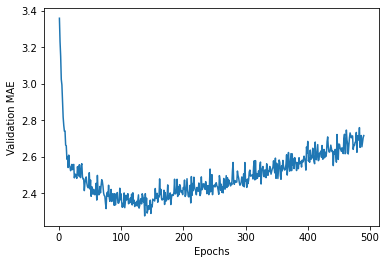

In [67]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### Training the final model

In [68]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 16.3156 - mae: 2.7541


In [69]:
test_mae_score

2.754063367843628

### Generating predictions on new data

In [70]:
predictions = model.predict(test_data)

for i in range(0,10):
  print("prediction: ", predictions[i])
  print("test_target: ", test_targets[i])
  print("test_data:", test_data[i])

prediction:  [9.251123]
test_target:  7.2
test_data: [ 1.55369355 -0.48361547  1.0283258  -0.25683275  1.03838067  0.23545815
  1.11048828 -0.93976936  1.67588577  1.5652875   0.78447637 -3.48459553
  2.25092074]
prediction:  [19.93405]
test_target:  18.8
test_data: [-0.39242675 -0.48361547 -0.16087773 -0.25683275 -0.08840061 -0.49947436
  0.85606329 -0.68396235 -0.39603557  0.15707841 -0.30759583  0.42733126
  0.47880119]
prediction:  [22.328657]
test_target:  19.0
test_data: [-0.39982927 -0.48361547 -0.86940196 -0.25683275 -0.3615597  -0.39790979
 -0.84607575  0.52864277 -0.51114231 -1.094663    0.78447637  0.44807713
 -0.41415936]
prediction:  [33.20094]
test_target:  27.0
test_data: [-0.26780504 -0.48361547  1.24588095  3.89358447  0.40670026 -0.02409575
  0.84531294 -0.95767141 -0.51114231 -0.01744323 -1.71818909 -0.1687668
 -0.99934525]
prediction:  [24.408495]
test_target:  22.2
test_data: [-0.39803715 -0.48361547 -0.97229967 -0.25683275 -0.92495034 -0.2060656
 -0.43756238  0.00

### (OPTIONAL) TODO 6: [MODEL 2]

Write code to try different combinations of:
- K for K-fold validation
- number of epochs
- number of units per hidden layer
- number of hidden layers 

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

****

**SEE BELOW**

In [71]:
# 
# we define a new build_model function with a new underlying model structure
# three layers and more units per layer
# 
# note scope of model variable is local here, it is returned however
#
def build_model2():

    model = keras.Sequential([
        layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ])
  
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  
    return model

In [72]:
k = 7                                         # retrain with kfold = 7

num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):

    #print(f"Processing fold #{i}")
    firstindex = i*num_val_samples
    secondindex = (i+1)*num_val_samples
    
    print(f"FOLD #{i} Validation Data: train_data[{firstindex}:{secondindex}]")

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    print(f"val_data shape: {val_data.shape}")

    print(f"FOLD #{i} (Partial) Train Data: train_data[:{firstindex}] + train_data[{secondindex}:]")

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    print(f"partial_train_data shape: {partial_train_data.shape}")

    print("building, fitting and evaluating model...")

    model_new = build_model2()          # we use the new model here

    model_new.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)

    val_new_mse, val_new_mae = model_new.evaluate(val_data, val_targets, verbose=0)

    print()
    
    all_scores.append(val_new_mae)

FOLD #0 Validation Data: train_data[0:57]
val_data shape: (57, 13)
FOLD #0 (Partial) Train Data: train_data[:0] + train_data[57:]
partial_train_data shape: (347, 13)
building, fitting and evaluating model...

FOLD #1 Validation Data: train_data[57:114]
val_data shape: (57, 13)
FOLD #1 (Partial) Train Data: train_data[:57] + train_data[114:]
partial_train_data shape: (347, 13)
building, fitting and evaluating model...

FOLD #2 Validation Data: train_data[114:171]
val_data shape: (57, 13)
FOLD #2 (Partial) Train Data: train_data[:114] + train_data[171:]
partial_train_data shape: (347, 13)
building, fitting and evaluating model...

FOLD #3 Validation Data: train_data[171:228]
val_data shape: (57, 13)
FOLD #3 (Partial) Train Data: train_data[:171] + train_data[228:]
partial_train_data shape: (347, 13)
building, fitting and evaluating model...

FOLD #4 Validation Data: train_data[228:285]
val_data shape: (57, 13)
FOLD #4 (Partial) Train Data: train_data[:228] + train_data[285:]
partial_trai

In [73]:
all_scores

[1.7352747917175293,
 2.311404228210449,
 2.2827706336975098,
 2.044377326965332,
 2.5915048122406006,
 2.735421657562256,
 1.9750452041625977]

In [74]:
np.mean(all_scores)

2.2393998077937534

In [ ]:
# we use same epochs as initial model above so we can compare apples to apples
num_epochs = 500             

rm_all_mae_histories = []    #revised_model histories (ie rm)

#
# build the new model, histories...
#
for i in range(k):

    print(f"Processing fold #{i}")

    #
    # we grab the validation data/targets for the kfold slice
    # we are working with, note that 
    # num_val_samples = len(train_data) // k, as set above
    #
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    rm_model = build_model2()     # we use the second model specs here, ie model2

    #
    # we grab the history of the individual k fold,
    # ie fit it to the partial train and test data
    #
    rm_history = rm_model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    
    #
    # we grab the mae (mean absolute error) value 
    # from the history data, from the specific kfold run
    #
    rm_mae_history = rm_history.history["val_mae"]
    
    #
    # we append the revised model mae data to the all histories
    # data which we print out, plot and compare below
    #
    rm_all_mae_histories.append(rm_mae_history)

Processing fold #0


In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
new_model = build_model2()

new_model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)

test_mse_score, test_mae_score = new_model.evaluate(test_data, test_targets)

In [ ]:
new_predictions = new_model.predict(test_data)

for i in range(0,10):
  print("prediction: ", new_predictions[i])
  print("test_target: ", test_targets[i])
  print("test_data:", test_data[i])

### CONCLUSIONS


***Questions: PART 3:***

**(1) What type of preprocessing was applied to the raw input data? Why was
it necessary to do so?**

*The feature data is 'normalized' to facilitate the processing of the data from heteregenous data from each of the different fdeatires, or attributes, of the data set, each of which that has a different range and unit really (for example # of bedrooms versus amount of land). This feature wise normalization is done by for each feauture in the input data (or column in the input data matrix), subtract the mean of the feature and divide by the standard deviation, so that the fature is centered around 0 and has a unit standard deviation, where the mean and standard deviation are calculated against the training data set (versus the test data set)*

Or:

mean = train_data.mean(axis=0); 
train_data -= mean;
std = train_data.std(axis=0);
train_data /= std;
test_data -= mean;
test_data /= std;


**(2) Why is this problem a case of regression (rather than classification)?**

*Because we are predicting the value, a single value (in this case home price), against a set of features of attributes (or given a set of attributes or features), rather than predicting the classification of the input data against a set of possible classifications as we did in the MINST or the Reuters data sets for example, each of which predicted (as a probability) the classification of a given input data (image in the case of MINST and text in the case of Reuters) - numbers 0-9 in the MINST image data set and 1 of 46 categories in the Reuters data set.*

*"In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable, or a 'label' in machine learning parlance) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features'). The most common form of regression analysis is linear regression, in which one finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion."*

- wikipedia, https://en.wikipedia.org/wiki/Regression_analysis


**(3) Does your model suffer from overfitting? If so, what would you suggest
doing about it?**

*Yes, at about 120-160 epochs, depending upon the kfold value we are using. The recommendation would be to stop training at this number of epochs to avoid, or at least minimize, overfitting. We do this in the second pass against the data with k = 7 + additional neural network layers with a smaller # of epochs*

(4) Is mean absolute error (MAE) a good metric of success in this case? Why
(not)?

*Yes it is, its measuring how far off we are, on average, for each of the data points based upon the actual values vs the predicted values.*